# Movie Embeddings

shape (9724, 100)
max= 34.92473226275253
average= -0.22562851636664383
min= -24.612896026646865


(array([8.6710e+03, 5.4300e+02, 2.2500e+02, 1.1800e+02, 1.1800e+02,
        4.5100e+02, 4.6170e+03, 9.5540e+04, 8.4161e+05, 1.7915e+04,
        1.6250e+03, 4.8200e+02, 2.3200e+02, 1.1400e+02, 5.6000e+01,
        4.4000e+01, 2.6000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([-24.61289603, -21.63601461, -18.6591332 , -15.68225178,
        -12.70537037,  -9.72848895,  -6.75160754,  -3.77472613,
         -0.79784471,   2.1790367 ,   5.15591812,   8.13279953,
         11.10968095,  14.08656236,  17.06344378,  20.04032519,
         23.0172066 ,  25.99408802,  28.97096943,  31.94785085,
         34.92473226]),
 <a list of 20 Patch objects>)

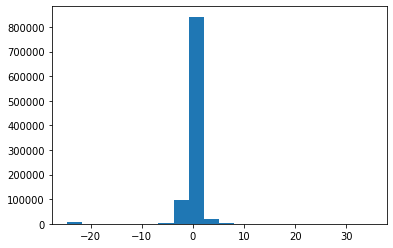

In [20]:
import numpy as np
import matplotlib.pyplot as plt

movie_embeddings = np.load(file="../../data/embeddings_movie_train.npy")

print("shape", movie_embeddings.shape)
print("max=", np.max(movie_embeddings))
print("average=", np.mean(movie_embeddings))
print("min=", np.min(movie_embeddings))

plt.hist(x=movie_embeddings.flatten(), bins=20)

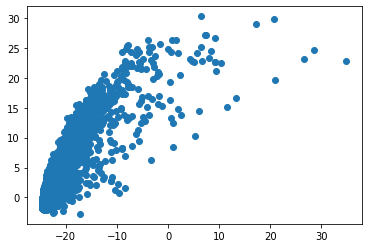

In [21]:
plt.scatter(x=movie_embeddings[:,0], y=movie_embeddings[:,1])

### Clusters

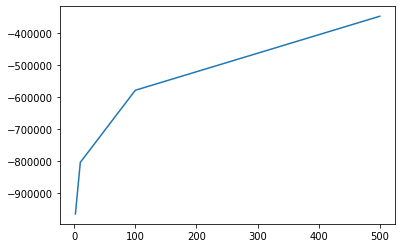

In [22]:
from sklearn.cluster import KMeans

candids_cluster_sizes = [2, 10, 100, 500]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=movie_embeddings)
    scores.append(kmeans_model.score(movie_embeddings))

plt.plot(candids_cluster_sizes, scores)


In [23]:
kmeans_model = KMeans(n_clusters=10, random_state=1).fit(X=movie_embeddings)
membership = kmeans_model.predict(X=movie_embeddings)

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(movie_embeddings[:1000, :])

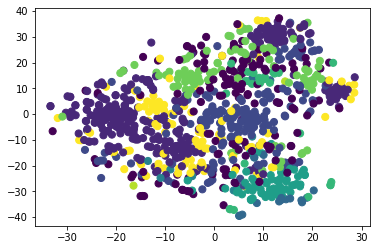

In [25]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership[:1000], s=50)

# User Embeddings

shape (610, 100)
max= 119.48472774046043
average= 0.9534908199588359
min= -53.654805133965915


(array([5.0000e+00, 6.0000e+00, 3.0000e+01, 9.9000e+01, 6.5300e+02,
        9.5060e+03, 4.8497e+04, 1.2290e+03, 2.0900e+02, 7.6000e+01,
        3.9000e+01, 1.4000e+01, 1.4000e+01, 1.4000e+01, 1.3000e+01,
        2.4000e+01, 1.0700e+02, 4.6300e+02, 1.0000e+00, 1.0000e+00]),
 array([-53.65480513, -44.99782849, -36.34085185, -27.6838752 ,
        -19.02689856, -10.36992192,  -1.71294527,   6.94403137,
         15.60100802,  24.25798466,  32.9149613 ,  41.57193795,
         50.22891459,  58.88589123,  67.54286788,  76.19984452,
         84.85682117,  93.51379781, 102.17077445, 110.8277511 ,
        119.48472774]),
 <a list of 20 Patch objects>)

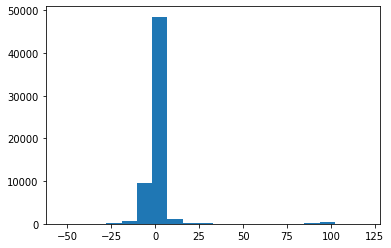

In [26]:
user_embeddings = np.load(file="../../data/embeddings_user_train.npy")

print("shape", user_embeddings.shape)
print("max=", np.max(user_embeddings))
print("average=", np.mean(user_embeddings))
print("min=", np.min(user_embeddings))

plt.hist(x=user_embeddings.flatten(), bins=20)

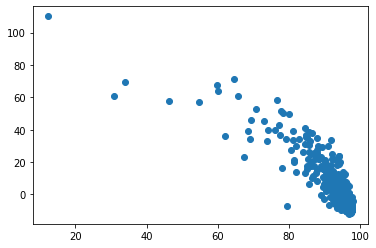

In [27]:
plt.scatter(x=user_embeddings[:,0], y=user_embeddings[:,1])

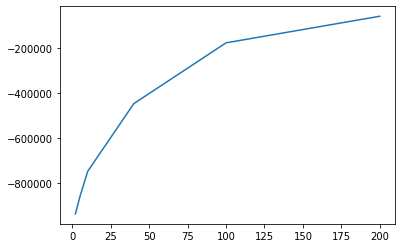

In [28]:
candids_cluster_sizes = [2, 5, 10, 40, 100, 200]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=user_embeddings)
    scores.append(kmeans_model.score(user_embeddings))

plt.plot(candids_cluster_sizes, scores)


In [29]:
kmeans_model = KMeans(n_clusters=40, random_state=1).fit(X=user_embeddings)
membership = kmeans_model.predict(X=user_embeddings)

In [30]:
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(user_embeddings)

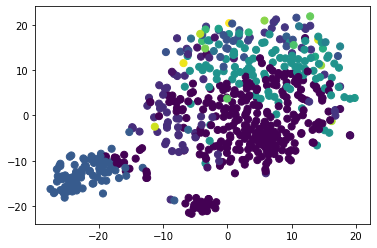

In [31]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership, s=50)

# Feature quality

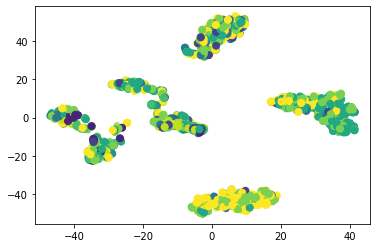

In [32]:
ground_truth_train = np.load(file="./data/rated_embeddings_train.npy")
train_x = ground_truth_train[:, 2:-1]
train_true_ratings = ground_truth_train[:,-1]

tsne = TSNE(n_components=2)
tsne_train_x = tsne.fit_transform(train_x[:1000, :])

plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=train_true_ratings[:1000], vmin=0, vmax=5, s=50)